# Task1: Top Cuisines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('restaurants.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
print(df.shape)
print(df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [9]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9542, dtype: object


In [10]:
df = df.dropna(subset=['Cuisines'])

In [11]:
cuisine_series = df['Cuisines'].str.split(',').explode().str.strip()

### Determine the top three most common cuisines in the dataset.

In [12]:
cuisine_count=df['Cuisines'].str.split(',').explode('Cuisines').value_counts()
print(cuisine_count)
top_cuisines = cuisine_count.head(3)
print(top_cuisines)

Cuisines
North Indian      2992
 Chinese          1880
 Fast Food        1314
 North Indian      968
Chinese            855
                  ... 
 Ramen               1
Indonesian           1
 Bubble Tea          1
Kiwi                 1
 World Cuisine       1
Name: count, Length: 249, dtype: int64
Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64


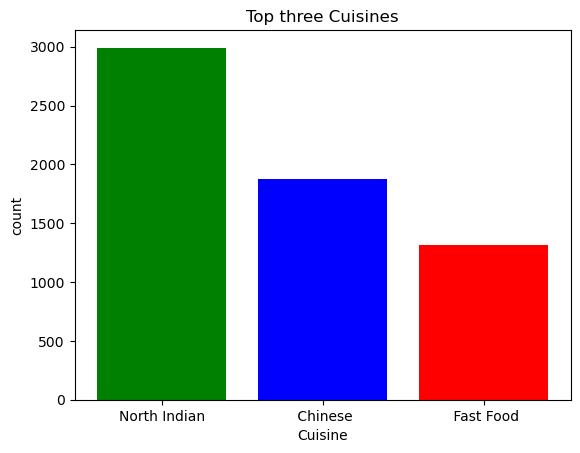

In [14]:
colors=['green','blue','red']
plt.bar(top_cuisine.index,top_cuisine.values,color=colors)
plt.xlabel('Cuisine')
plt.ylabel('count')
plt.title('Top three Cuisines')
plt.show()

### Calculate the percentage of restaurants that serve each of the top cuisines.

In [15]:
total_restaurants = len(df)
print(total_restaurants)
top_cuisine10=cuisine_count.head()
percentages = (top_cuisine10 / total_restaurants) * 100
print("The Market share of top 5 cuisinea are:",percentages) 

9542
The Market share of top 5 cuisinea are: Cuisines
North Indian     31.356110
 Chinese         19.702368
 Fast Food       13.770698
 North Indian    10.144624
Chinese           8.960386
Name: count, dtype: float64


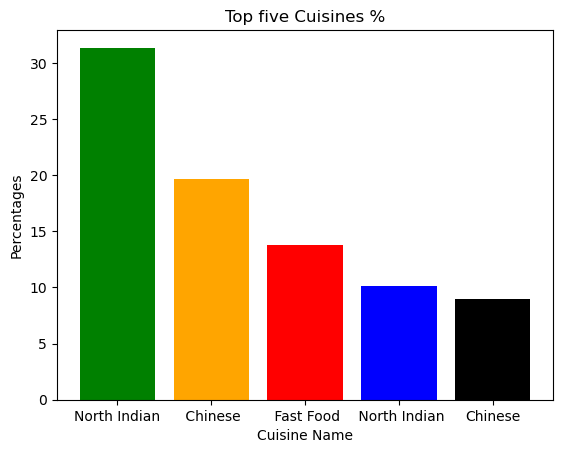

<Figure size 1400x700 with 0 Axes>

In [16]:
colors=['green','orange','red','blue','black']
plt.bar(top_cuisine10.index,percentages.values,color=colors)
plt.xlabel('Cuisine Name')
plt.ylabel('Percentages')
plt.title('Top five Cuisines %')
plt.figure(figsize=(14,7))
plt.show()